# **Induced Pairing**

In [1]:
import cmath
import numpy as np
import matplotlib.pyplot as plt

from MTI_Second_Order import FMTI2_NeumannBC

# labels for curves
Flabels = [["$f_{\\uparrow +, \\uparrow +}$", "$f_{\\uparrow +, \downarrow +}$", "$f_{\\uparrow +, \\uparrow -}$", "$f_{\\uparrow +, \downarrow -}$"],
          ["$f_{\downarrow +, \\uparrow +}$", "$f_{\downarrow +, \downarrow +}$", "$f_{\downarrow +, \\uparrow -}$", "$f_{\downarrow +, \downarrow -}$"],
          ["$f_{\\uparrow -, \\uparrow +}$", "$f_{\\uparrow -, \downarrow +}$", "$f_{\\uparrow -, \\uparrow -}$", "$f_{\\uparrow -, \downarrow -}$"],
          ["$f_{\downarrow -, \\uparrow +}$", "$f_{\downarrow -, \downarrow +}$", "$f_{\downarrow -, \\uparrow -}$", "$f_{\downarrow -, \downarrow -}$"]]

# colors for plotting
colors_real = ['brown', 'red', 'orange', 'gold']
# colors for plotting
colors_imag = ['blue','dodgerblue','lightskyblue','cyan']
# colors for plotting
colors_abs = ["#0077FF", "#00CC00", "#FFD700", "#FF2200"]


# finite z-lattice
d = 100.; lattice = np.linspace(0., d, 250)
# parameters
mu = 0.010; Delta = 0.005; L = 0.010; omega = 0.0025
# coupling matrices
Gamma = np.matrix([[1,0],[0,1],[1,0],[0,1]])

F2 = np.array([FMTI2_NeumannBC(d=d, z=z, Z=z, z0=0, kx=0.001, ky=0.002, L=L, mu=mu, Delta=Delta, omega=omega, Gamma=Gamma) for z in lattice])
print(F2.shape)

(250, 4, 4)


## Check on Antisymmetry

In order to satisy the Pauli principle, the anomalous Green's fucntion must satisfy the following antisymmetry relation:
$$
    \mathcal{F}^{\dagger}_{\alpha\beta}(k_x,k_y; z,z';\omega) = - \mathcal{F}^{\dagger}_{\beta\alpha}(-k_x,-k_y; z',z;-\omega) \,.
$$

In [2]:
z1 = 8; z2 = 59; kx = -0.0094; ky = 0.058; w = 0.003

f = FMTI2_NeumannBC(d=d, z=z1, Z=z2, z0=0., kx=kx, ky=ky, L=L, mu=mu, Delta=Delta, omega=w, Gamma=Gamma)
print(f)
print()

finv = FMTI2_NeumannBC(d=d, z=z2, Z=z1, z0=0., kx=-kx, ky=-ky, L=L, mu=mu, Delta=Delta, omega=-w, Gamma=Gamma)
print(-finv)
print()

div = np.divide( f, np.transpose(finv) )
add = np.add( f, np.transpose(finv) ); add[np.abs(add) < 1E-6] = 0

print(add)

[[ 3.67171171e-04-2.65817435e-04j  2.16170485e-04-2.44326560e-04j
  -2.65070695e-04-8.77478274e-05j -8.80029608e-05+1.48149033e-04j]
 [ 2.40453492e-04+2.98040746e-04j  2.67134574e-04+2.37887608e-04j
  -4.30477362e-05-1.42584998e-04j -2.88745982e-04+2.79969171e-05j]
 [ 2.10365331e-04+2.98042470e-04j  4.76336817e-05+2.45145837e-04j
  -4.20601792e-05-4.47300834e-04j -2.30756422e-04-4.14422069e-04j]
 [ 1.16129075e-04-3.57837613e-04j  1.76978174e-04-2.01670503e-04j
  -3.25693697e-04+3.17193888e-04j -1.76708387e-04+4.58276914e-04j]]

[[ 3.67171171e-04-2.65817435e-04j  2.40453492e-04+2.98040746e-04j
   2.10365331e-04+2.98042470e-04j  1.16129075e-04-3.57837613e-04j]
 [ 2.16170485e-04-2.44326560e-04j  2.67134574e-04+2.37887608e-04j
   4.76336817e-05+2.45145837e-04j  1.76978174e-04-2.01670503e-04j]
 [-2.65070695e-04-8.77478274e-05j -4.30477362e-05-1.42584998e-04j
  -4.20601792e-05-4.47300834e-04j -3.25693697e-04+3.17193888e-04j]
 [-8.80029608e-05+1.48149033e-04j -2.88745982e-04+2.79969171e-05j
 

## Spatial Dependence

#### <font color='green'> **Absolute Value** </font> 

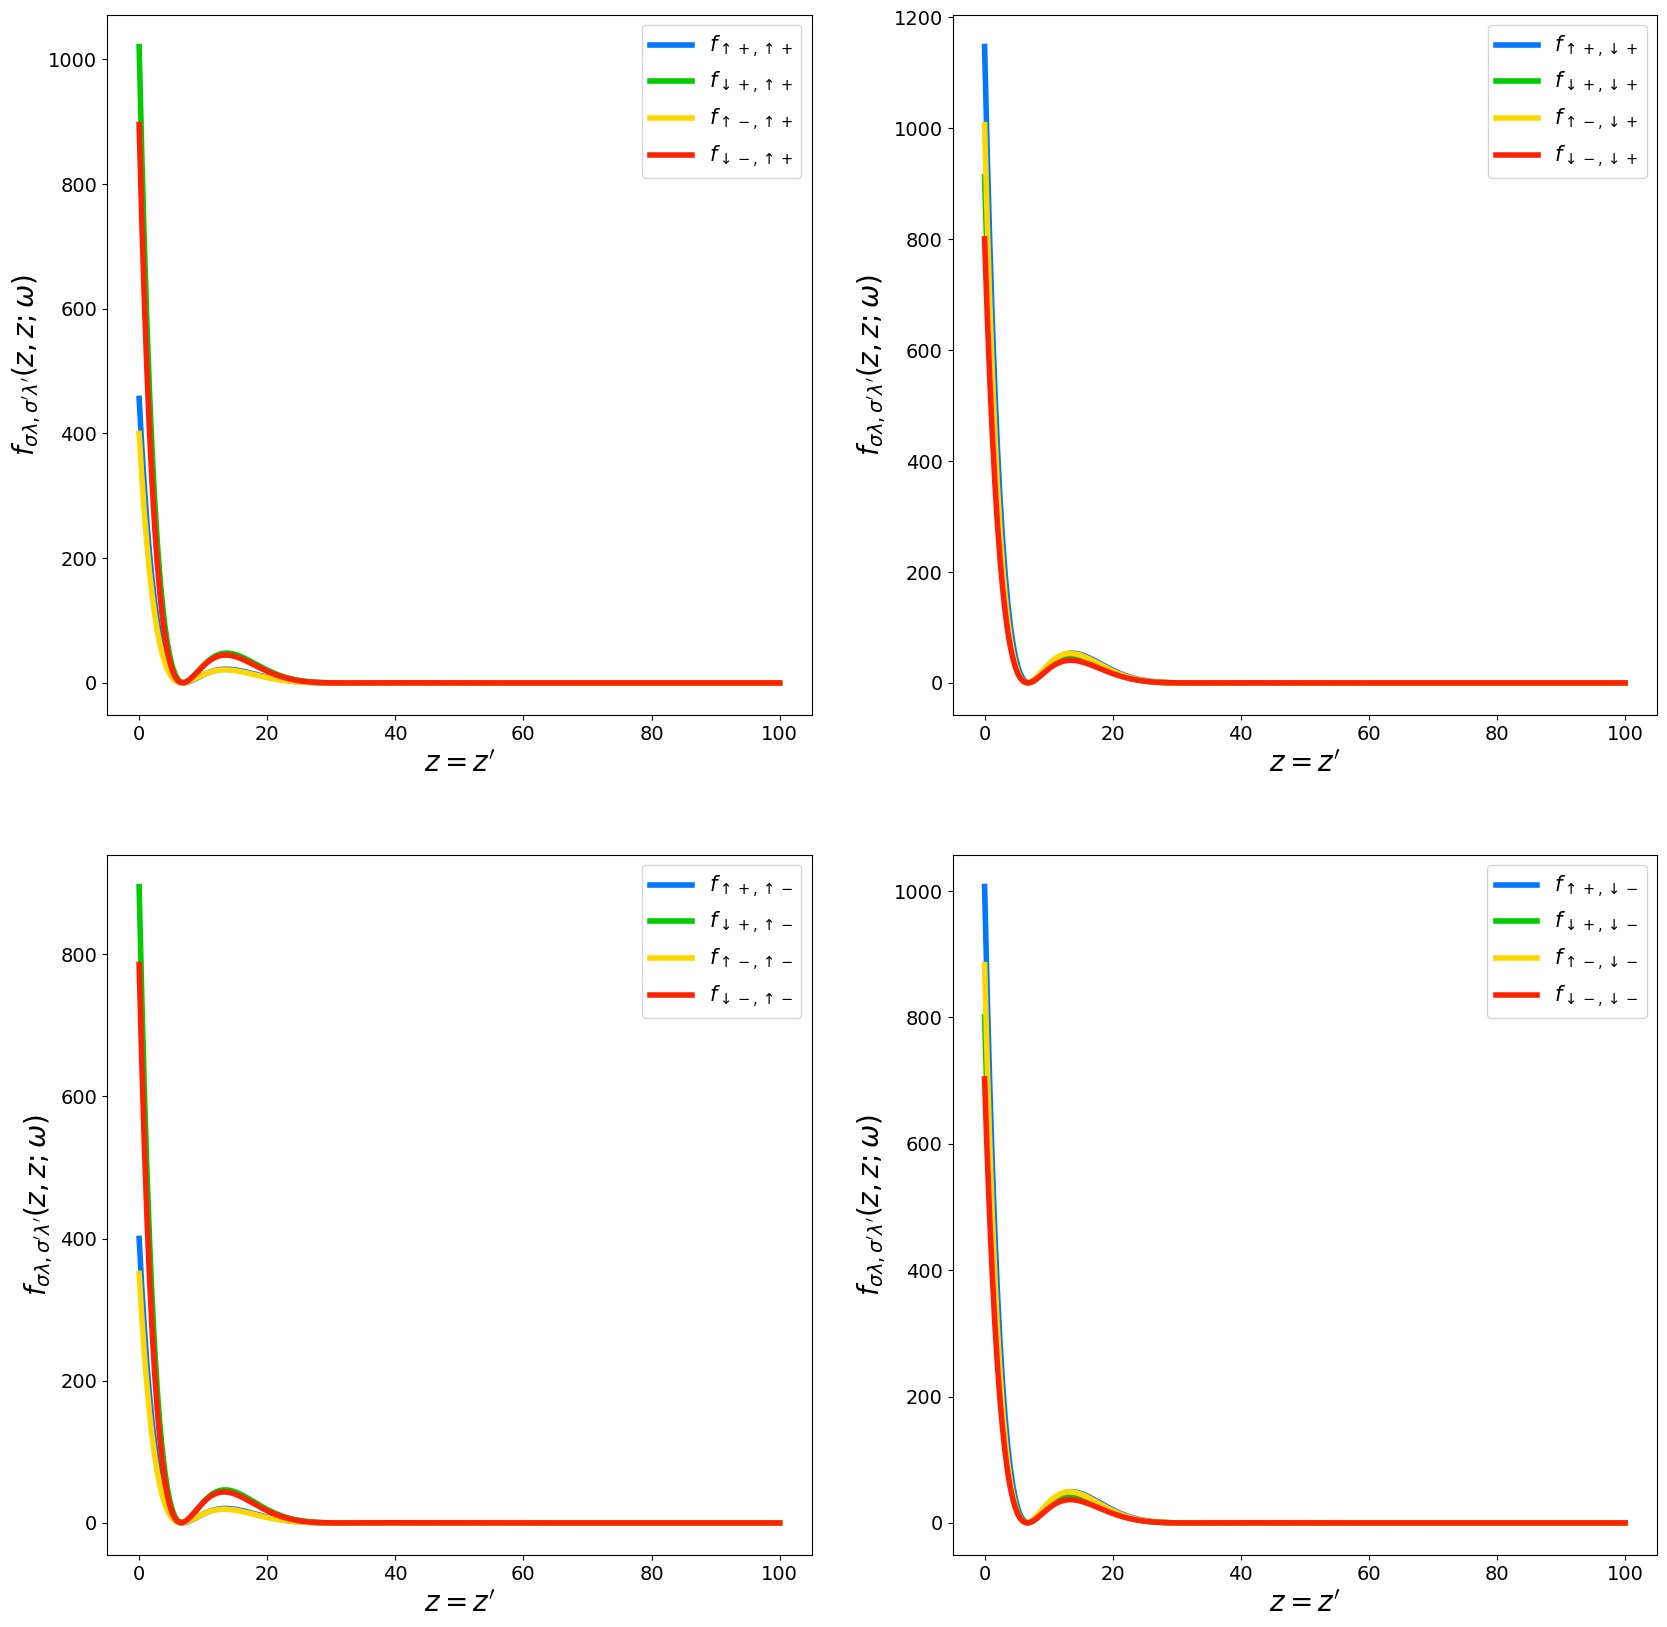

In [3]:
# colors
colors = colors_abs
# subplots
fig, axs = plt.subplots(2,2, figsize=(20, 20))


# indices referred to GF matrix
for icol in range(4):
        
    # indices for plotting
    if icol==0: iPic = 0; jPic = 0
    if icol==1: iPic = 0; jPic = 1
    if icol==2: iPic = 1; jPic = 0
    if icol==3: iPic = 1; jPic = 1
    
    for irow in range(4):

        # plot second order correction F2
        axs[iPic][jPic].plot(lattice, abs(F2[:,irow,icol]), c=colors[irow], lw=4, label=Flabels[irow][icol] )

    
    axs[iPic][jPic].set_xlabel("$z=z'$", fontsize = 20)
    axs[iPic][jPic].set_ylabel("$f_{\sigma\lambda, \sigma'\lambda'}(z,z;\omega)$", fontsize = 20)
        
    axs[iPic][jPic].tick_params(axis='both', which='major', labelsize=14)        
    axs[iPic][jPic].legend(fontsize=15)

## Frequency Dependence

In [4]:
# parameters
d = 100.; mu = 0.010; Delta = 0.005; L = 0.050; z0=0
# frequency
frequency = np.linspace(-0.0049, 0.0049, 150)
# coupling matrices
Gamma = np.matrix([[1,0],[0,1],[1,0],[0,1]])

F2 = np.array([FMTI2_NeumannBC(d=d, z=5., Z=5., z0=0., kx=0.005, ky=-0.005, L=L, mu=mu, Delta=Delta, omega=f, Gamma=Gamma) for f in frequency])
print(F2.shape)

(150, 4, 4)


#### <font color='green'> **Absolute Value** </font> 

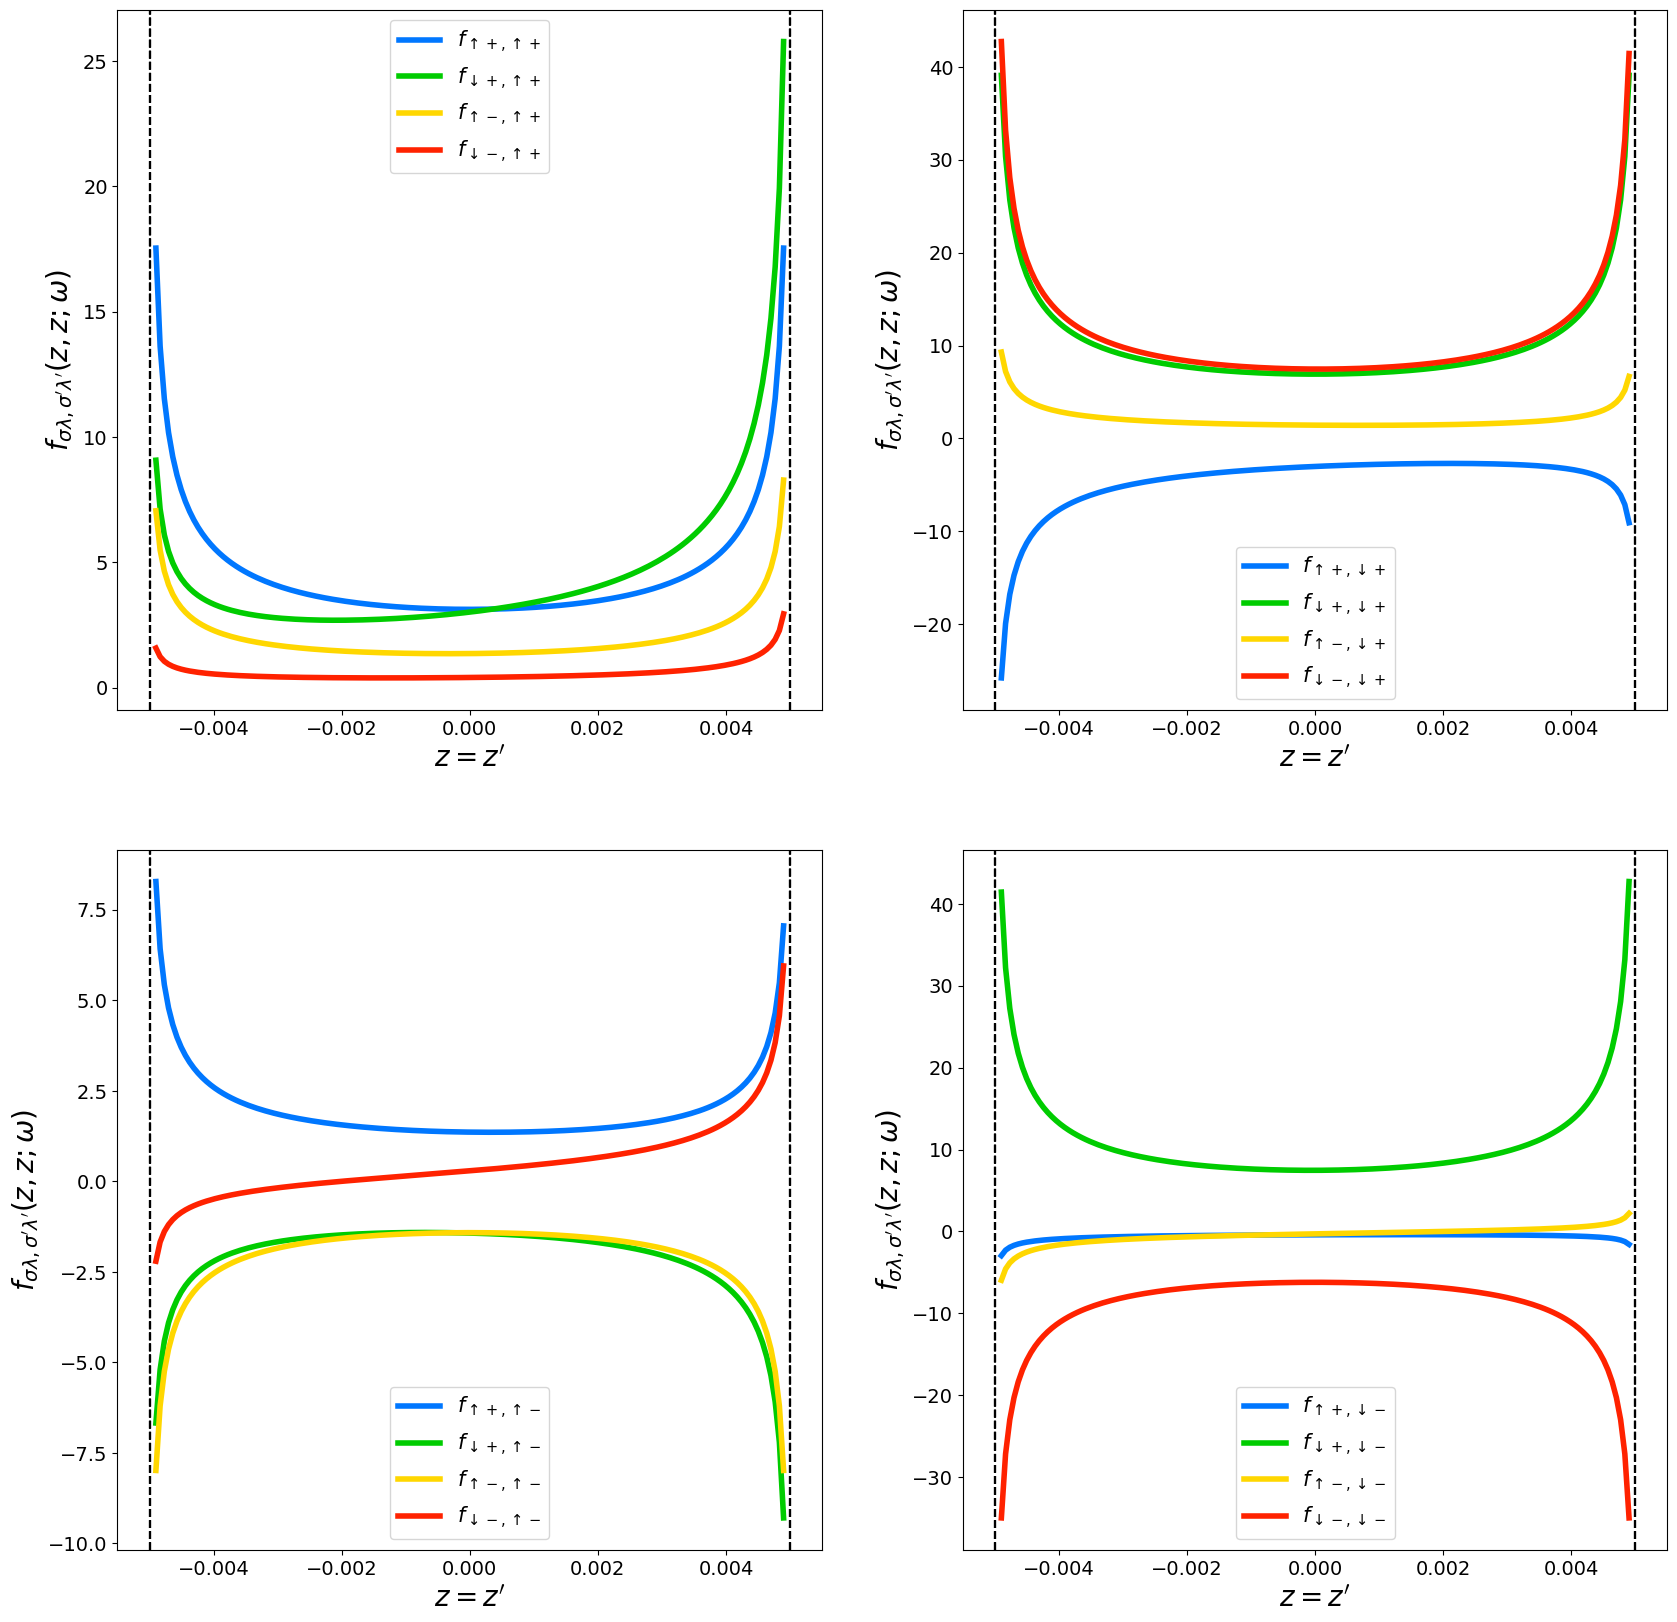

In [5]:
# colors
colors = colors_abs
# subplots
fig, axs = plt.subplots(2,2, figsize=(20, 20))


# indices referred to GF matrix
for icol in range(4):
        
    # indices for plotting
    if icol==0: iPic = 0; jPic = 0
    if icol==1: iPic = 0; jPic = 1
    if icol==2: iPic = 1; jPic = 0
    if icol==3: iPic = 1; jPic = 1
    
    for irow in range(4):

        axs[iPic][jPic].axvline(x=Delta, c='black', lw=1.5, ls='--'); axs[iPic][jPic].axvline(x=-Delta, c='black', lw=1.5, ls='--')

        # plot second order correction F2
        axs[iPic][jPic].plot(frequency, F2[:,irow,icol].imag, c=colors[irow], lw=4, label=Flabels[irow][icol] )
    
    axs[iPic][jPic].set_xlabel("$z=z'$", fontsize = 20)
    axs[iPic][jPic].set_ylabel("$f_{\sigma\lambda, \sigma'\lambda'}(z,z;\omega)$", fontsize = 20)
        
    axs[iPic][jPic].tick_params(axis='both', which='major', labelsize=14)        
    axs[iPic][jPic].legend(fontsize=15);

## <font color='black'> Wigner Transform </font> 

We switch to relative coordinates 
$$
    Z = \frac12 (z+z') \,, 
    \qquad
    \overline{z} = z-z' \,,
$$
in order to obtain the pairing as a function of center-of-mass $Z$ and relative position $\overline{z}$ of the two electrons forming a Cooper pair.
The opposite transformation from relative coordinates to separate coordinates $z$ and $z'$ is given by
$$
    z = Z+\frac12 \overline{z} \,, 
    \qquad
    z' = Z-\frac12 \overline{z} \,.
$$
Fixed the center of mass coordinate $Z$ of the Cooper pair, we can perform a *discrete Fourier transform* over the relative coordinate as
$$
    \mathcal{F}_{\alpha \beta}^{\dagger}(Z, k) = \sum_{\overline{z}} e^{-i k \overline{z}} 
    \mathcal{F}_{\alpha \beta}^{\dagger}(Z+\frac12 \overline{z}, Z-\frac12 \overline{z}) \,.
$$

### **Relative Coordinates**

In [6]:
# Evaluate discrete Fourier transform in relative coordinates
# kZ0=center of mass of Cooper pair, Nzrel=number of discrete lattice points for z relative
def DiscreteFT(d, Z0, kx, ky, L, mu, Delta, omega, Gamma, Nzrel=200, z0=0, C = -0.0068, D1 = 1.3, D2 = 19.6, A1 = 2.2, A2 = 4.1, M = 0.28, B1 = 10, B2 = 56.6, hbar=1., t=1.):
    

    # boundaries for |z1-z2|
    max_zrel = max(d, d-Z0)
    # discrete lattice for relative coordinates
    zrelative = np.linspace(-max_zrel, max_zrel, Nzrel)    
    
    # lattice spacing for relative coordinates
    a = abs( zrelative[1]-zrelative[2] ); N = len(zrelative)

    # F2 in relative coordinates
    F2_rc = []; 
    # loop over relative coordinate z
    for z in zrelative:
    
        # separate coordinates z1, z2
        z1 = Z0 + 1/2*z; z2 = Z0 - 1/2*z
    
        # evaluate F2 as function of relative position z for fixed center of mass Z
        F2_rc.append( FMTI2_NeumannBC(d=d, z=z1, Z=z2, z0=z0, kx=kx, ky=ky, L=L, mu=mu, Delta=Delta, omega=omega, Gamma=Gamma, C=C, D1=D1, D2=D2, A1=A1, A2=A2, M=M, B1=B1, B2=B2, hbar=hbar) )
    
    # array for F2 in relative coordinates (real space)
    F2_rc = np.array(F2_rc)

    # get array of k values
    k = 2*np.pi * np.fft.fftshift(np.fft.fftfreq(N, d=a))
    # evaluate the Wigner transform
    F2_k = np.fft.fftshift(np.fft.fft(F2_rc))
    
    return k, F2_k


# center of mass
Z0 = 1
# lattice for relative distances
zrelative = np.linspace(-10,10,200)
# finite z-lattice
d = 100.; lattice = np.linspace(0., d, 250)
# parameters
kx = 0.00; ky = 0.00; mu = 0.010; Delta = 0.005; L = 0.010; omega = 0.; z0=0
# coupling matrices
Gamma = np.matrix([[1,0],[0,1],[1,0],[0,1]])

# compute discrete FT
k, F2_k = DiscreteFT(d=d, Z0=Z0, kx=kx, ky=ky, L=L, mu=mu, Delta=Delta, omega=omega, Gamma=Gamma)
print(k.shape, F2_k.shape)

(200,) (200, 4, 4)


#### <font color='green'> **Wigner Transform** </font> 

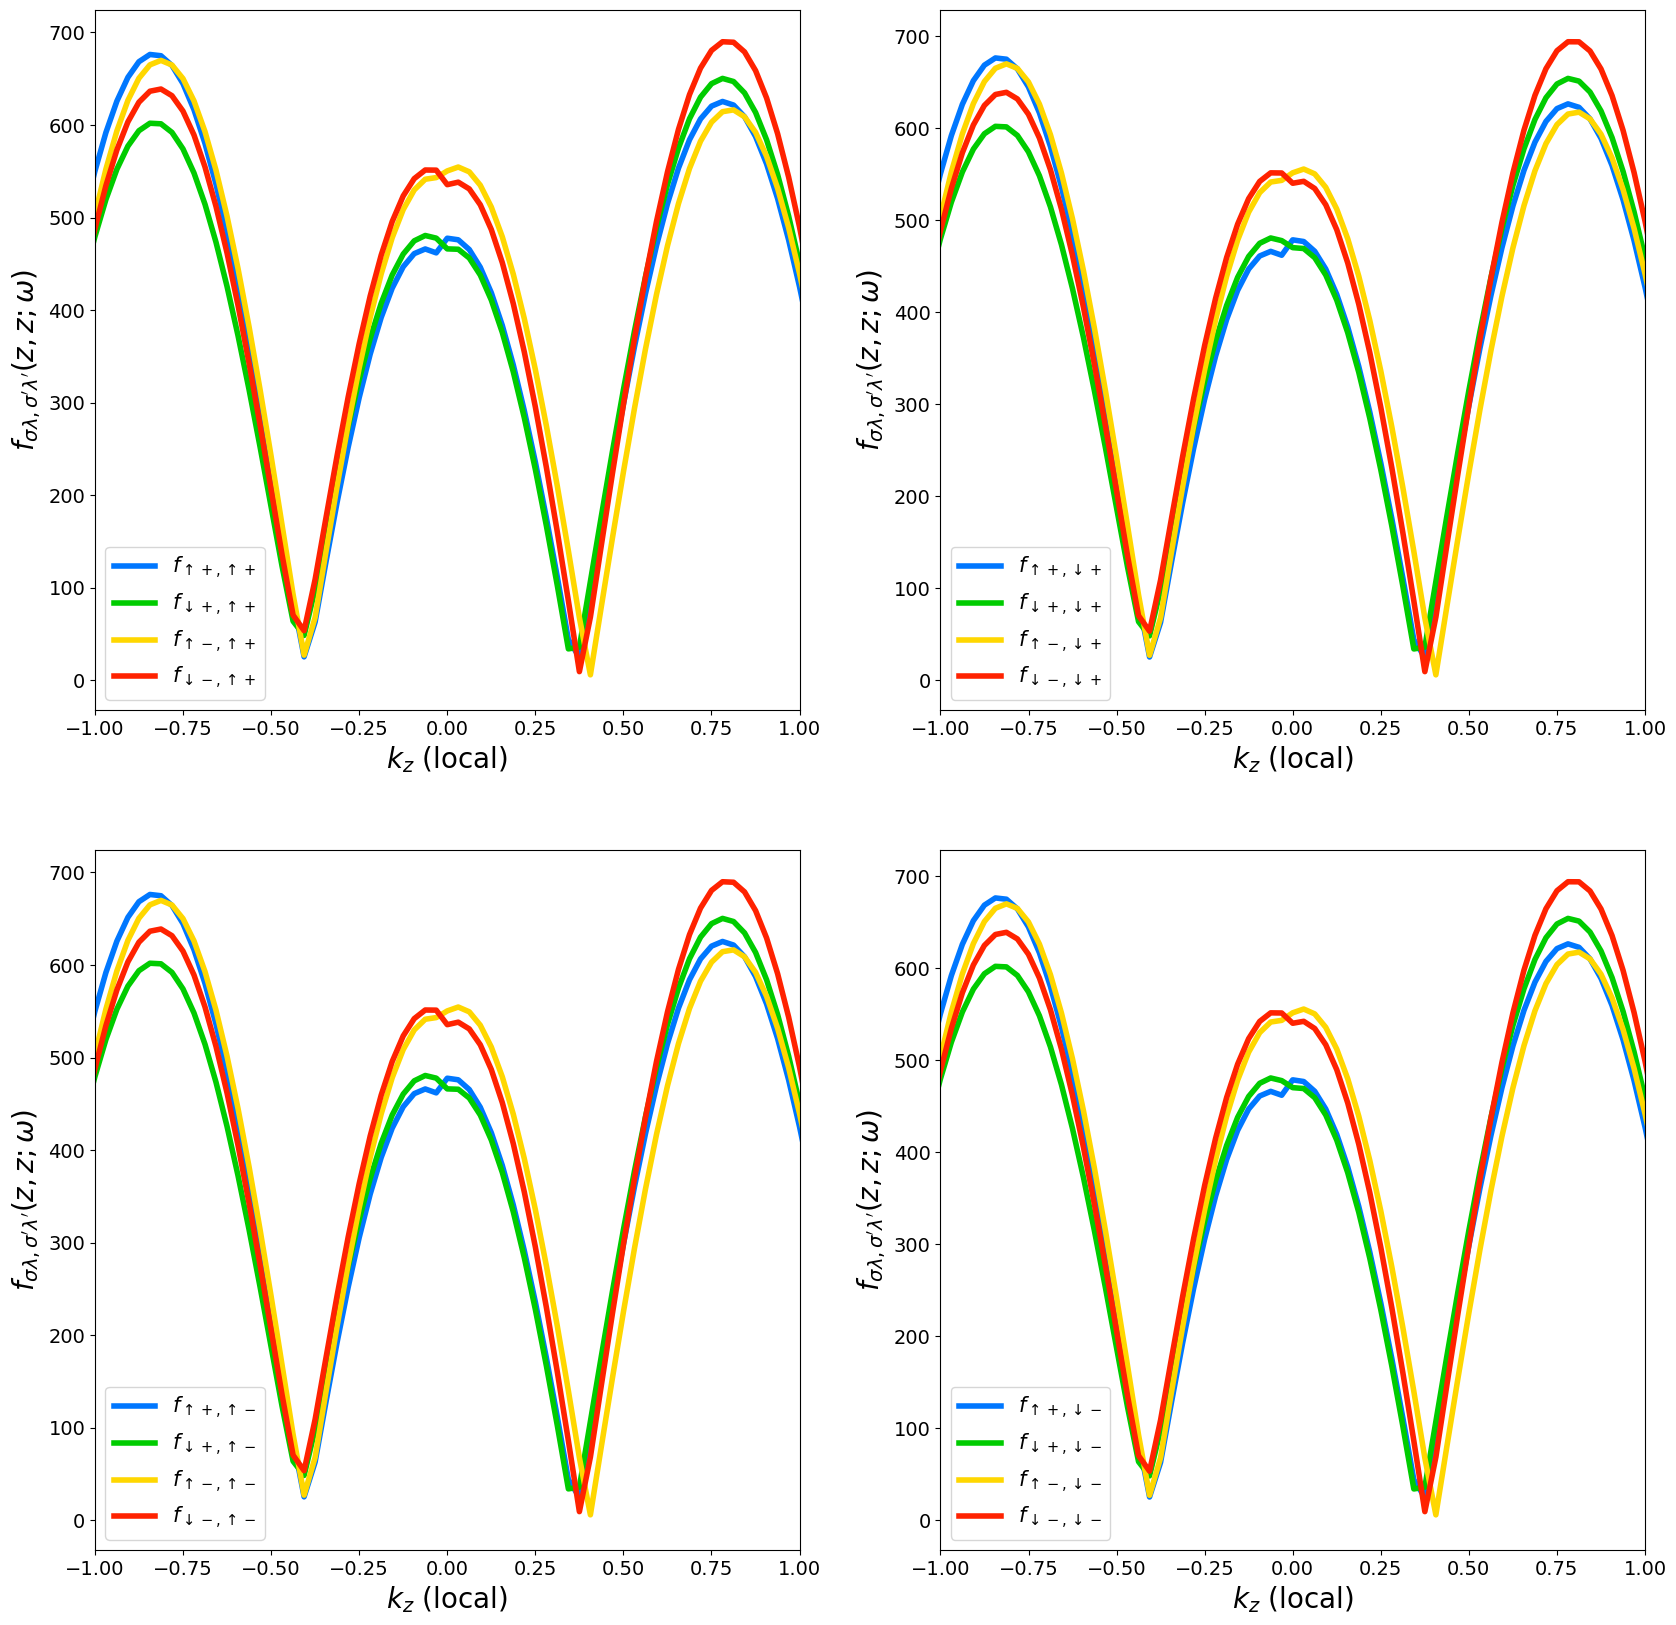

In [7]:
# colors
colors = colors_abs
# subplots
fig, axs = plt.subplots(2,2, figsize=(20, 20))


# indices referred to GF matrix
for icol in range(4):
        
    # indices for plotting
    if icol==0: iPic = 0; jPic = 0
    if icol==1: iPic = 0; jPic = 1
    if icol==2: iPic = 1; jPic = 0
    if icol==3: iPic = 1; jPic = 1
    
    for irow in range(4):

        # plot second order correction F2
        axs[iPic][jPic].plot(k, abs(F2_k[:,irow,icol]), c=colors[irow], lw=4, label=Flabels[irow][icol] )
    
    axs[iPic][jPic].set_xlim(-1,1) 
    
    axs[iPic][jPic].set_xlabel("$k_z$ (local)", fontsize = 20)
    axs[iPic][jPic].set_ylabel("$f_{\sigma\lambda, \sigma'\lambda'}(z,z;\omega)$", fontsize = 20)
        
    axs[iPic][jPic].tick_params(axis='both', which='major', labelsize=14)        
    axs[iPic][jPic].legend(fontsize=15);

# **Channel Decomposition** 

We decompose the induced pairing in a basis of 16 matrices that generates the whole space made by the outer product of spin $\sigma = \uparrow, \downarrow$ and orbital $\lambda=\pm$.
The $4 \times 4$ matrix can be decomposed as
$$
    \Delta_{ind} (\mathbf{k},\omega) = \sum_A f_A (\mathbf{k},\omega) \Lambda_A \,,
$$
where $\{ \Lambda_a \}$ is a the set of 16 matrices given by 
$$
    \Lambda_A = \sigma_a \otimes \lambda_b \,,
$$
with $a,b \in \{ 0,x,y,z \}$.
The functions $f_A(\mathbf{k},\omega)$ are obtained through projection of the induced pairing matrix over the corresponding matrix $\Lambda_A$ through
$$
    f_A(\mathbf{k},\omega) = \frac14 \text{Tr} \bigl\lbrack \Lambda_A \, \Delta_{ind}(\mathbf{k},\omega) \bigr\rbrack \,.
$$
With such decomposition we can select the functions $f_A(\mathbf{k},\omega)$ corresponding to each channel $A$ and we can study the symmetry in momentum and frequency space.
For instance we can study the symmetry of the component $f_A(\mathbf{k},\omega)$ corresponding to the spin singlet or triplet channel.
This channels are given by the following matrices:

- **spin singlet** $\Lambda_s = \sigma_y \otimes \lambda_a$ with $a \in \{ 0,x,y,z \}$;

- **spin triplet** $\Lambda_t = \sigma_a \otimes \lambda_b$ with $a \in \{ 0,x,,z \}$ and $b \in \{0,x,y,z\}$.

Indeed the matrix $\sigma_y$ is the only antisymmetric upon exchange of spin coordinates, i.e. $\sigma_y^T = - \sigma_y$.
The other matrices are all symmetric upon exchange of spin coordinates, namely $\sigma_a^T = - \sigma_a$ for $a=0,x,z$.


#### <font color='green'> **Spin Channels** </font> 

In [12]:
from Latex import spin_channels

channels = spin_channels('x')

for c in channels:
    display(c)

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

#### <font color='green'> **Projected Components** </font> 

In [3]:
from sympy import Matrix, Symbol
from Latex import singlet_triplet_projection, pairing_channels

# define your physical basis labels (spin x orbital)
basis = [r"\uparrow+", r"\uparrow-", r"\downarrow+", r"\downarrow-"]

# build a 4×4 Matrix of Symbols f_{α,β}
M = Matrix([[ Symbol(f"f_{{{i},{j}}}") 
              for j in basis ] 
            for i in basis ])

singlet_triplet_projection(M=M, spin='sym', orbital='asym')

pairing_channels(spin='sym', orbital='asym')

<IPython.core.display.Math object>

<IPython.core.display.Math object>

## Parity Sketch

Below are some sketch of functions corresponding to $s$-wave, $p$-wave and $d$-wave pairing in both momentum and real spaces.

#### <font color='green'> **Momentum Space** </font> 

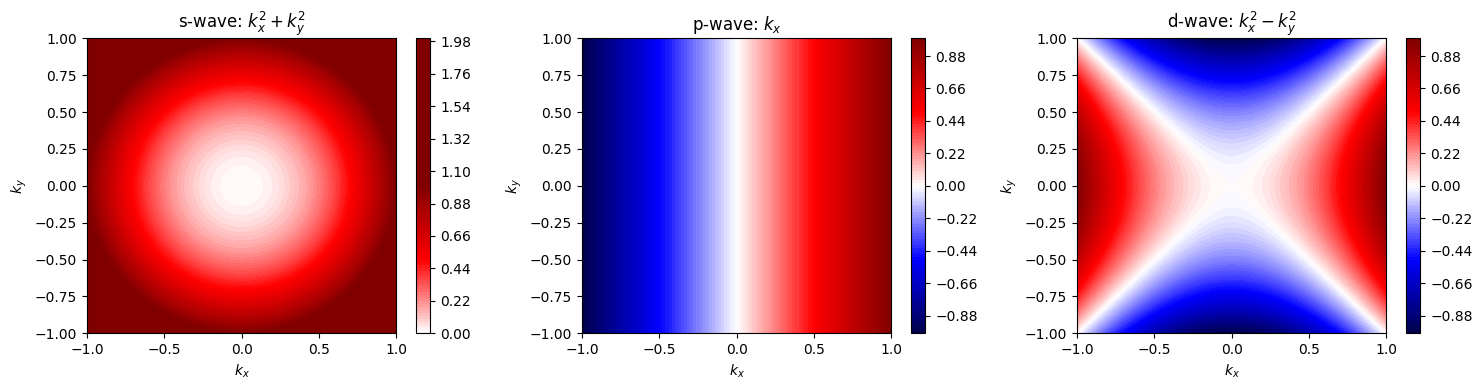

In [10]:
import numpy as np
import matplotlib.pyplot as plt

kx = np.linspace(-1, 1, 100)
ky = np.linspace(-1, 1, 100)
kx, ky = np.meshgrid(kx, ky)

f_s = kx**2 + ky**2
f_p = kx
f_d = kx**2 - ky**2

fig, axes = plt.subplots(1, 3, figsize=(15,4))

titles = ['s-wave: $k_x^2 + k_y^2$', 
          'p-wave: $k_x$', 
          'd-wave: $k_x^2 - k_y^2$']

for ax, f, title in zip(axes, [f_s, f_p, f_d], titles):
    c = ax.contourf(kx, ky, f, levels=100, vmin=-1, vmax=1, cmap='seismic')
    ax.set_xlabel('$k_x$')
    ax.set_ylabel('$k_y$')
    ax.set_title(title)
    fig.colorbar(c, ax=ax)

plt.tight_layout()
plt.show()

#### <font color='green'> **Real Space** </font> 

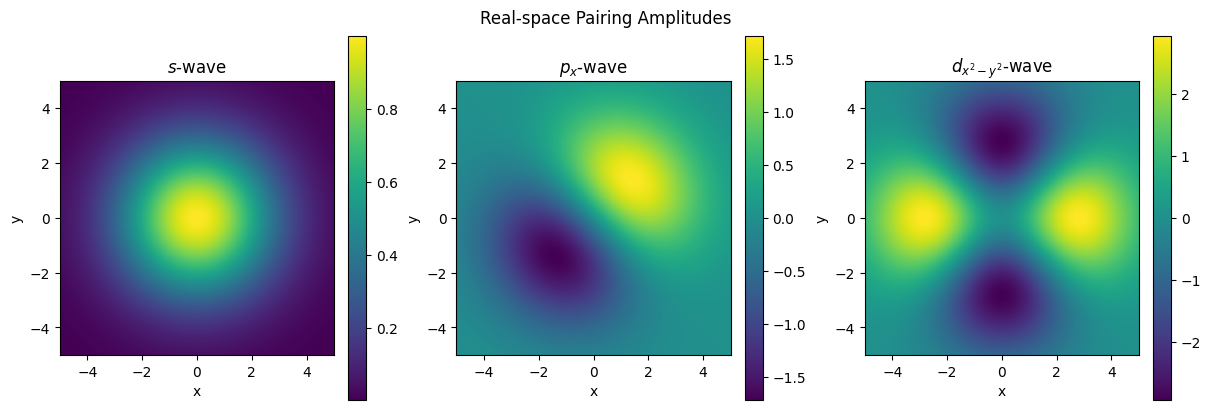

In [11]:
# real‐space grid
L = 5.0          # size in each direction
N = 400          # points per axis
x = np.linspace(-L, L, N)
y = np.linspace(-L, L, N)
X, Y = np.meshgrid(x, y)
R2 = X**2 + Y**2

# Gaussian envelope
sigma = 2.0
g = np.exp(-R2/(2*sigma**2))

# real‐space pairing functions
f_s =            g                # s‐wave: isotropic
f_p =  (X + Y) *      g                # p_x‐wave: changes sign under x→−x
f_d = (X**2-Y**2) * g            # d_{x²−y²}‐wave: nodal lines along x=±y

# plot them side‐by‐side
fig, axes = plt.subplots(1, 3, figsize=(12,4), constrained_layout=True)
for ax, f, title in zip(axes,
                       [f_s, f_p, f_d],
                       ['$s$-wave', '$p_x$-wave', '$d_{x^2−y^2}$-wave']):
    pcm = ax.pcolormesh(X, Y, f, shading='auto')
    ax.set_aspect('equal')
    ax.set_title(title)
    ax.set_xlabel('x'); ax.set_ylabel('y')
    fig.colorbar(pcm, ax=ax)

plt.suptitle('Real‐space Pairing Amplitudes')
plt.show()
